# 6.1 Classification 

## 6.1.1 Create a classification model using a logistic regression!

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
* Train a model that classifies the type of flower using (i) 2 features (sepal length and width) and (ii) all 4 features! Create a testing dataset of 25% for validation!
* Visualize the model!
* Create a confusion matrix!
* Compute precision and recall for every class in your model!

In [66]:
%matplotlib inline
import os, sys
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

In [14]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [59]:
iris_df.target_name

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target_name, Length: 150, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,0:2], iris_df.target, test_size=0.25, random_state=42)
lr_two_variables = LogisticRegression()
lr_two_variables.fit(X_train, y_train)
prediction_two_variables = lr_two_variables.predict(X_test)

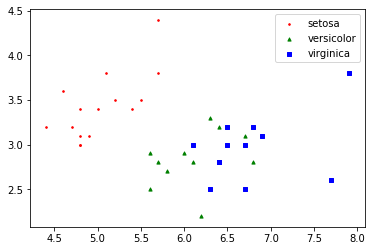

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_test[y_test==0].iloc[:,0], X_test[y_test==0].iloc[:,1], s=10, c='r', marker=".", label='setosa')
ax1.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], s=10, c='g', marker="^", label='versicolor')
ax1.scatter(X_test[y_test==2].iloc[:,0], X_test[y_test==2].iloc[:,1], s=10, c='b', marker="s", label='virginica')
plt.legend(loc='upper right');
plt.show()

In [16]:
confusion_matrix(y_true, y_test)

array([[15,  0,  0],
       [ 0,  7,  2],
       [ 0,  4, 10]])

In [30]:
m = classification_report(prediction_two_variables, y_test, output_dict=True)
precisions_two_variables = {x: m[str(x)]['precision'] for x in range(3)}
recalls_two_variables = {x:m[str(x)]['recall'] for x in range(3)}

In [32]:
precisions_two_variables

{0: 1.0, 1: 0.6363636363636364, 2: 0.8333333333333334}

In [33]:
recalls_two_variables

{0: 1.0, 1: 0.7777777777777778, 2: 0.7142857142857143}

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,0:4], iris_df.target, test_size=0.25, random_state=42)
lr_four_variables = LogisticRegression(max_iter=200)
lr_four_variables.fit(X_train, y_train)
prediction_four_variables = lr_four_variables.predict(X_test)

In [67]:
tsne = TSNE()

In [69]:
output = tsne.fit_transform(iris_df.iloc[:,:4])

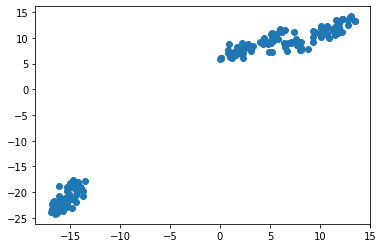

In [74]:
plt.scatter(output.T[0], output.T[1])

In [6]:
confusion_matrix(prediction_four_variables, y_test)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [31]:
m = classification_report(prediction_four_variables, y_test, output_dict=True)
precisions_four_variables = {x: m[str(x)]['precision'] for x in range(3)}
recalls_four_variables = {x:m[str(x)]['recall'] for x in range(3)}

In [34]:
precisions_four_variables

{0: 1.0, 1: 1.0, 2: 1.0}

In [35]:
recalls_four_variables

{0: 1.0, 1: 1.0, 2: 1.0}

## 6.1.2 Spark

* Using Spark MLlib to create a Logistic Regression!
    * https://spark.apache.org/docs/latest/ml-classification-regression.html
    * <https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LogisticRegression>
    
* Measure the training time. Compare the training time with the scikit-learn implementation! Explain! 

In [3]:
# Initialize PySpark
import os, sys
APP_NAME = "PySpark Lecture"
SPARK_MASTER="local[1]"
import pyspark
import pyspark.sql
from pyspark.sql import Row
conf=pyspark.SparkConf()
conf=pyspark.SparkConf().setAppName(APP_NAME).set("spark.local.dir", os.path.join(os.getcwd(), "tmp"))
sc = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()

print("PySpark initiated...")

PySpark initiated...
